In [1]:
%matplotlib widget

# EEGNet
## ICA Denoising Book

In [2]:

import sys, os
sys.path.insert(0, os.path.join(sys.path[0], '../../modules'))
os.chdir('c:/Users/roryp/vscodeprojects/bci2')

## imports
from preparation import load_comp, epoch_comp, loadall_pilot, epoch_pilot, comp_channel_map3
from evaluation import EEGNet, get_fold, add_kernel_dim, onehot, test_val_rest_split, test_model
from pathlib import Path
from tensorflow.python.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split, StratifiedKFold

### Define Notebook Constants

In [3]:
CLASSES = 3
GOODS = ['Fz','FC3','FC1','FC2','FC4','C5','C3','C1','Cz','C2','C4','C6','CP3','CP1','CPz','CP2','CP4','P1','Pz','P2','POz']
T_RANGE = [0.3, 2]
RESAMPLE = 128
LO_FREQ = 1.
HI_FREQ = 32.

### Load Base Data

In [4]:
from preparation import load_comp_array, prep_comp

subject_raws = prep_comp(load_comp_array(True), comp_channel_map3, GOODS, l_freq=LO_FREQ, h_freq=HI_FREQ)


loading data for participant 1
Extracting EDF parameters from c:\Users\roryp\vscodeprojects\bci2\data\competition\raw\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
C:\Anaconda3\envs\eegnet\lib\site-packages\mne\io\edf\edf.py:996: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]

loading data for participant 2
Extracting EDF parameters from c:\Users\roryp\vscodeprojects\bci2\data\competition\raw\A02T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...
C:\Anaconda3\envs\eegnet\lib\site-packages\mne\io\edf\edf.py:996: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  e

In [5]:
from mne.preprocessing import ICA

for subject_raw in subject_raws:
    ica = ICA(n_components=21)
    ica.fit(subject_raw)
    eog_indices, eog_scores = ica.find_bads_eog(subject_raw)
    print(eog_indices)

    ica.exclude = eog_indices
    ica.plot_scores(eog_scores)
    ica.apply(subject_raw)

Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 13.2s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition ban

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 3 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 15.7s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 3 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 16.7s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 2 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 20.4s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 1 ICA component
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 21.8s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) m

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 2 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 15.3s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 1 ICA component
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 15.2s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) m

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 2 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 13.7s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 3 ICA components
Fitting ICA to data using 21 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 21 components
Fitting ICA took 23.5s.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

Transforming to ICA space (21 components)
Zeroing out 3 ICA components


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

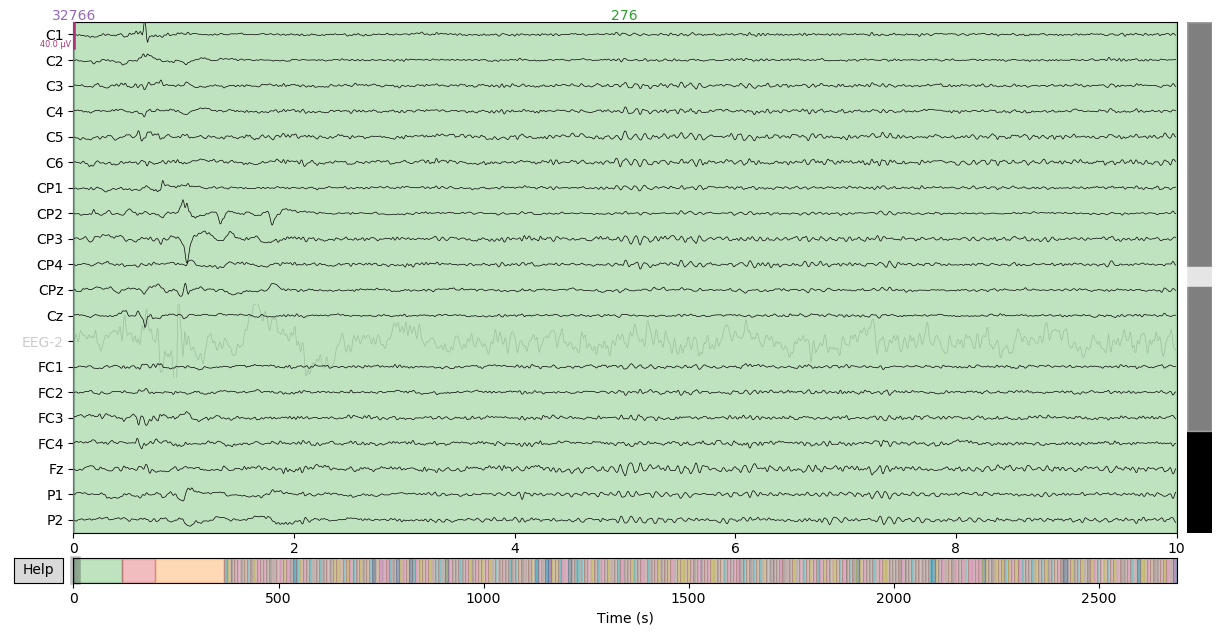

In [10]:
subject_raws[0].plot()

In [13]:
from mne import Epochs, events_from_annotations, pick_types

def epoch_subjects(raw, n_classes, resample=250, trange=[-0.2, 0.5]):
    """
    Prepares the BCIIV competition data into epoched data depending on a passed number 
    of classes. The following event_id mapping is used:

        class       |   annotation   |   id
        left hand   |   '769'        |   0
        right hand  |   '770'        |   1
        tongue      |   '772'        |   2

    If a list of raws are passed then they are each epoched using the same scheme and a
    list of Epochs objects are returned.
    """
    # if multiple raws passed
    if isinstance(raw, list):
        epochses = [[] for r in raw]
        for i, r in enumerate(raw):
            epochses[i] = epoch_subjects(r, n_classes, resample, trange)
            
        return epochses

    # get events
    if   n_classes == 3: events, event_id = events_from_annotations(raw, event_id={'769': 0, '770': 1, '772': 2})
    elif n_classes == 2: events, event_id = events_from_annotations(raw, event_id={'769': 0, '770': 1})
    else: exit()

    # epoch creation and resampling
    picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
    epochs = Epochs(raw, events, event_id, proj=False, picks=picks, baseline=None, preload=True, verbose=False, event_repeated='merge', tmin=trange[0], tmax=trange[1])
    epochs = epochs.resample(resample)

    return epochs

print(len(subject_raws))

subject_epochs = epoch_subjects(subject_raws, 3, 128, [0.3, 2.0])

9
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']
Used Annotations descriptions: ['769', '770', '772']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

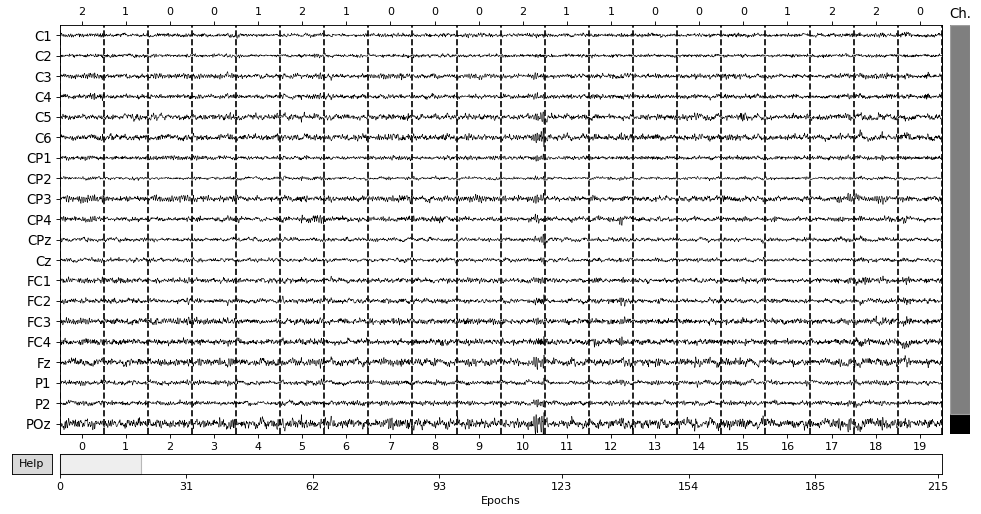

In [14]:
subject_epochs[0].plot()

In [15]:
out_folder = 'data/competition/epoched/ica'

for i, subject_raw in enumerate(subject_epochs):
    subject_raw.save(f'{out_folder}/A0{i+1}T-epo.fif', overwrite=True)

Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


In [16]:
from mne import read_epochs

subject_1 = read_epochs('data/competition/epoched/ica/A01T-epo.fif', preload=False)

Reading data/competition/epoched/ica/A01T-epo.fif ...
    Found the data of interest:
        t =     296.88 ...    1992.19 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated


In [17]:
print(subject_1)

<EpochsFIF |  216 events (all good), 0.296875 - 1.99219 sec, baseline off, ~63 kB, data not loaded,
 '769': 72
 '770': 72
 '772': 72>
